In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* Les fichiers ECG doivent être numérotés de 00 à .... (à l'origine le 1er fichier n'a pas de numéro, le second porte le numéro 1 etc.)

In [2]:
os.chdir("/Users/Patrice/DataspellProjects/Physio/Data/La_planete_au_tresor/ecg/electrocardiograms")

# Lecture d'un fichier ecg.....csv

In [3]:
date = pd.read_csv("ecg_2022-02-27_1.csv",skiprows=2,header=None,names=["name","date"], nrows=1, parse_dates=['date'])

FileNotFoundError: [Errno 2] No such file or directory: 'ecg_2022-02-27_1.csv'

In [90]:
date = date['date']

In [93]:
print(date[0])

2022-02-27 15:53:02+01:00


In [5]:
ecg = pd.read_csv("ecg_2022-02-27_01.csv",skiprows=13,header=None,names=["dérivation","dérivationDI"])

In [261]:
ecg.head()

,dérivation,dérivationDI
0,-357,146.0
1,-488,874.0
2,-489,978.0
3,-455,9.0
4,-452,955.0


In [291]:
#ecg2 = ecg2.assign(heart_Rate=np.nan)

In [6]:
ecg['Heart Rate'] = [np.nan for i in range(len(ecg))]

In [8]:
ecg.head()

,dérivation,dérivationDI,Heart Rate
0,-357,146.0,NaN
1,-488,874.0,NaN
2,-489,978.0,NaN
3,-455,9.0,NaN
4,-452,955.0,NaN


<AxesSubplot:>

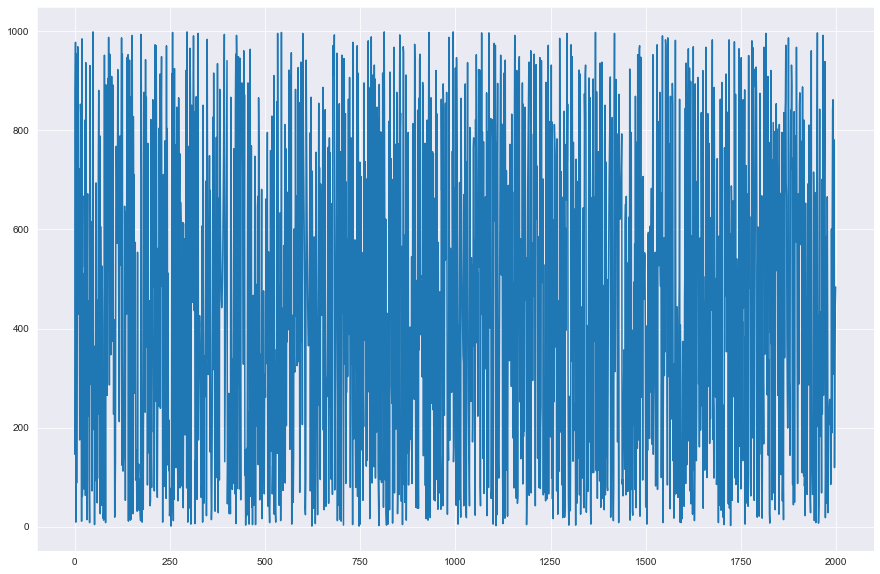

In [29]:
ecg.iloc[0:2000]['dérivationDI'].plot(figsize=(15,10))

<AxesSubplot:>

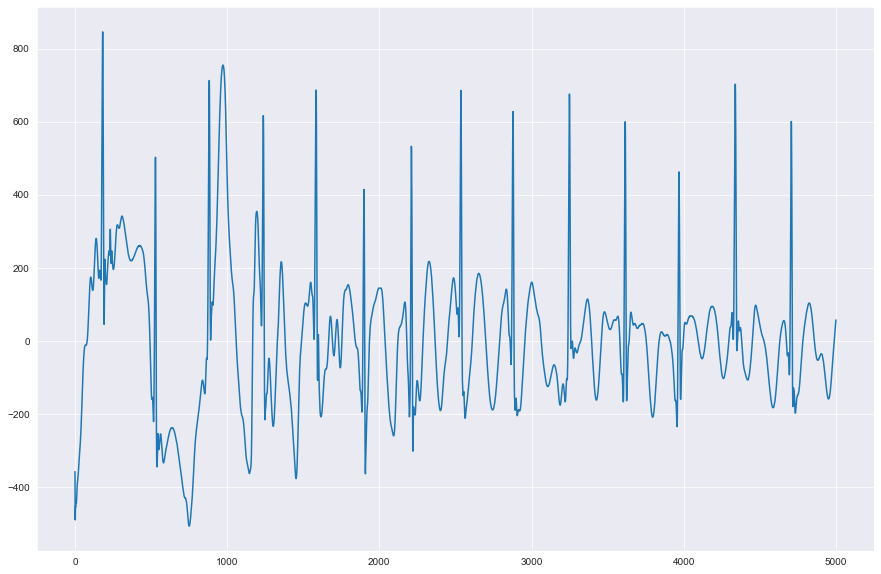

In [28]:
ecg.iloc[0:5000]['dérivation'].plot(figsize=(15,10))

<AxesSubplot:>

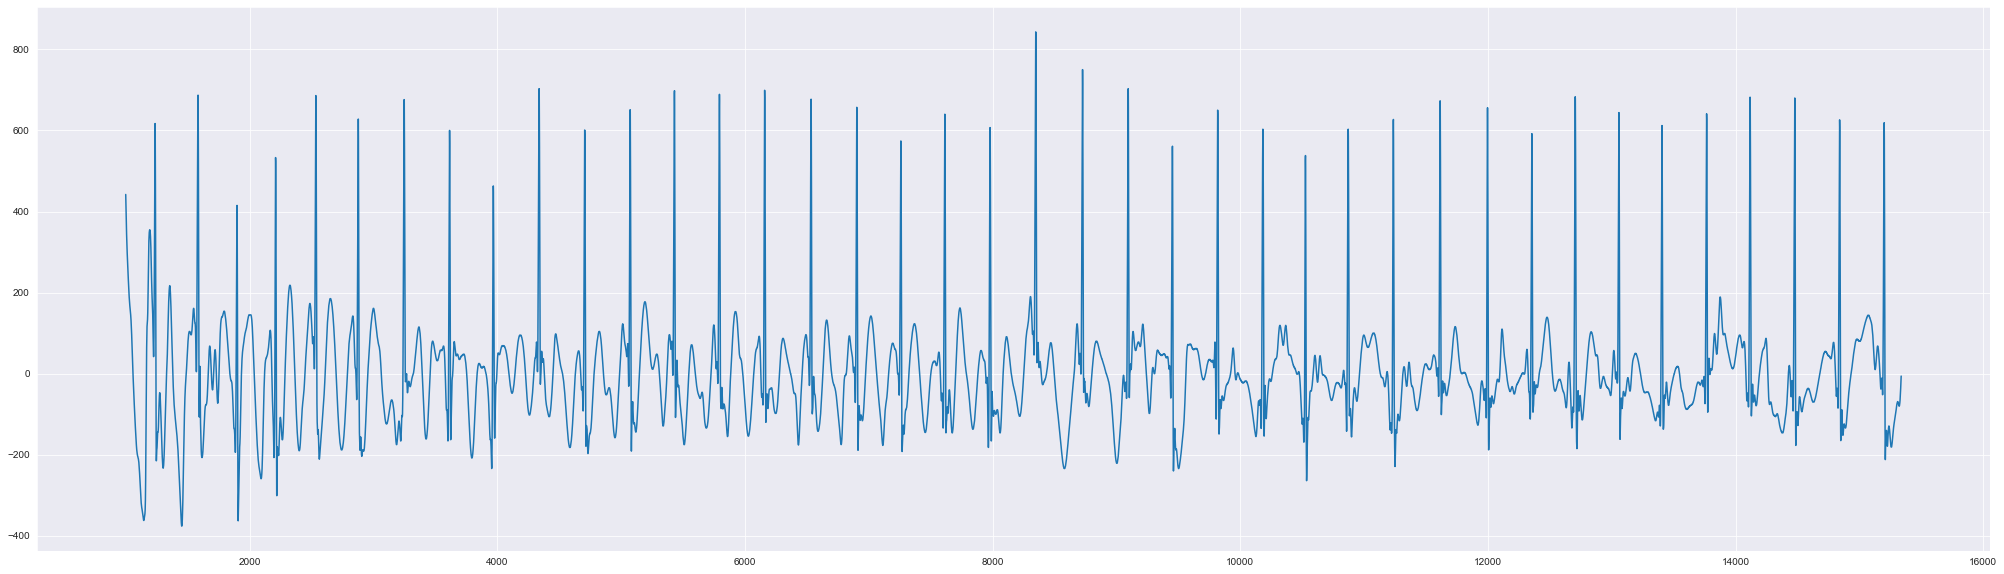

In [50]:
ecg.iloc[1000:]['dérivation'].plot(figsize=(35,10))

<AxesSubplot:>

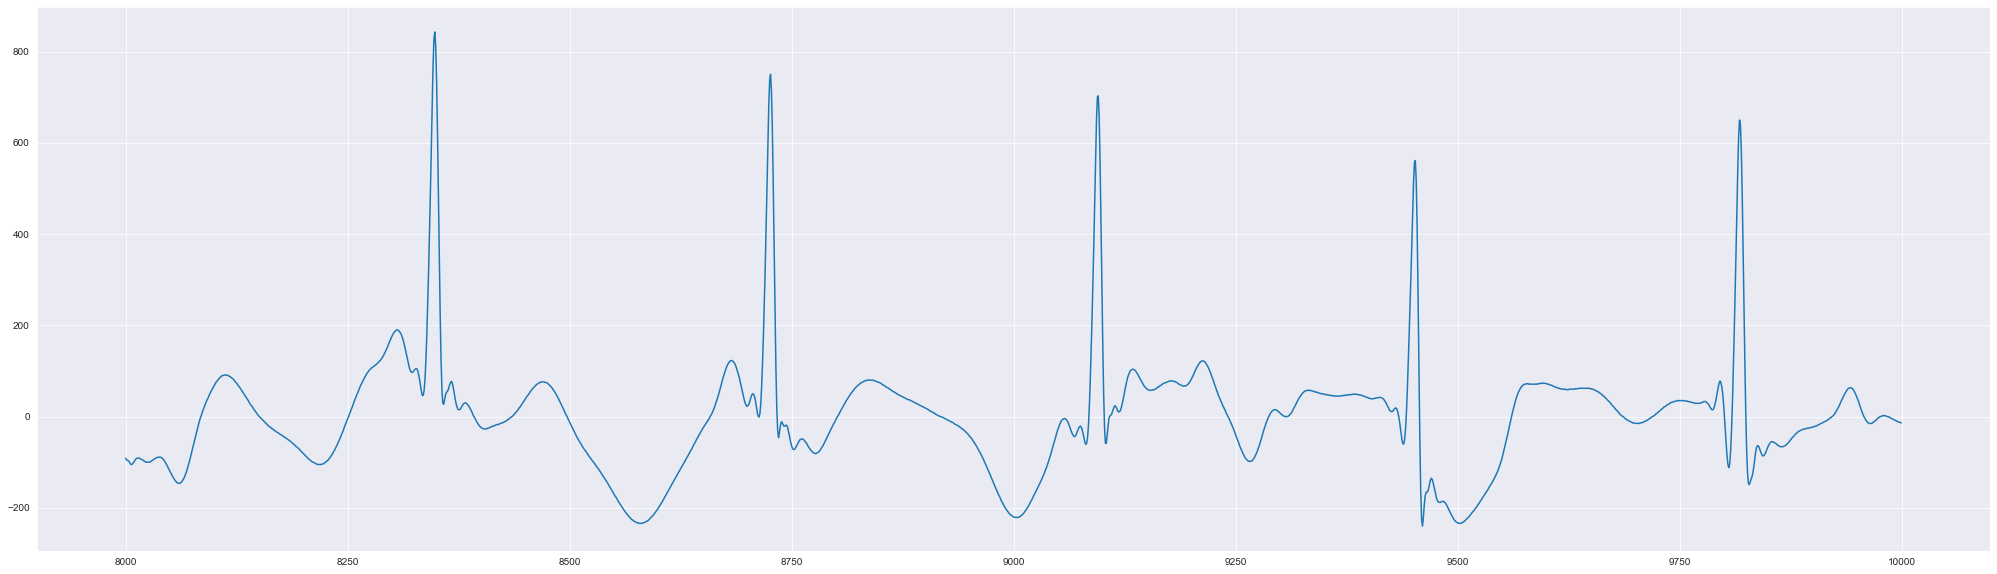

In [67]:
ecg.iloc[8000:10000]['dérivation'].plot(figsize=(35,10))

<AxesSubplot:>

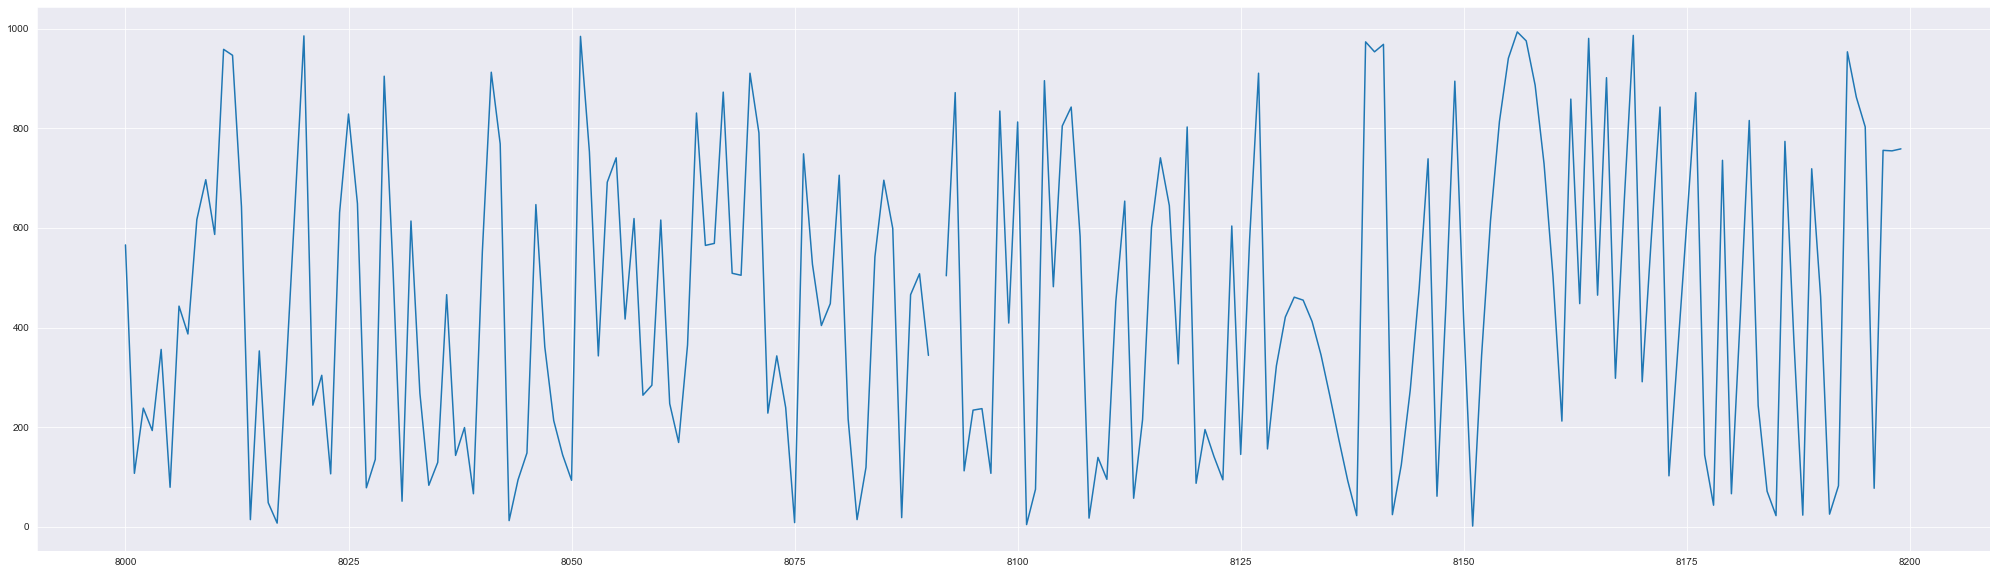

In [71]:
ecg.iloc[8000:8200]['dérivationDI'].plot(figsize=(35,10))

In [20]:
ecg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15337 entries, 0 to 15336
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dérivation    15337 non-null  int64  
 1   dérivationDI  15323 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 239.8 KB


In [21]:
ecg.describe()

,dérivation,dérivationDI,Heart Rate
count,15337.000000,15323.000000,0.0
mean,1.878399,455.492658,NaN
std,146.764123,304.552587,NaN
min,-506.000000,1.000000,NaN
25%,-77.000000,167.500000,NaN
50%,-9.000000,446.000000,NaN
75%,61.000000,719.000000,NaN
max,846.000000,999.000000,NaN


In [59]:
ecg.query('dérivation>500')

,dérivation,dérivationDI,Heart Rate
177,546,9.0,NaN
178,628,251.0,NaN
179,709,59.0,NaN
180,782,35.0,NaN
181,833,372.0,NaN
...,...,...,...
14841,544,669.0,NaN
15197,555,697.0,NaN
15198,610,314.0,NaN
15199,619,478.0,NaN


In [81]:
limite = 3*ecg.dérivation.std()
n = 0
n_prec = 0
periode = 1/511.244
while n < len(ecg):
    max = ecg.iloc[n].dérivation
    if  (max > limite):
        while True:
            if (n+1 < len(ecg) and ecg.iloc[n+1].dérivation >= max):
                max = ecg.iloc[n+1].dérivation
                n +=1
            else:
                break
        print (n, max, end=' ')
        if n_prec > 0:
            rate = int(60/((n-n_prec)*periode))
            print (f"rythme = {rate} pour une différence de {n-n_prec}")
            ecg.iloc[n,2] = rate
        else:
            print ('')
        n_prec = n
        n +=120
    else:
        n +=1

182 846.0 
529 503.0 rythme = 88 pour une différence de 347
882 713.0 rythme = 86 pour une différence de 353
1237 617.0 rythme = 86 pour une différence de 355
1584 687.0 rythme = 88 pour une différence de 347
2210 533.0 rythme = 49 pour une différence de 626
2535 686.0 rythme = 94 pour une différence de 325
2878 628.0 rythme = 89 pour une différence de 343
3248 676.0 rythme = 82 pour une différence de 370
3615 600.0 rythme = 83 pour une différence de 367
3968 463.0 rythme = 86 pour une différence de 353
4338 703.0 rythme = 82 pour une différence de 370
4706 601.0 rythme = 83 pour une différence de 368
5073 651.0 rythme = 83 pour une différence de 367
5431 698.0 rythme = 85 pour une différence de 358
5794 689.0 rythme = 84 pour une différence de 363
6159 699.0 rythme = 84 pour une différence de 365
6534 677.0 rythme = 81 pour une différence de 375
6903 657.0 rythme = 83 pour une différence de 369
7259 574.0 rythme = 86 pour une différence de 356
7614 640.0 rythme = 86 pour une différenc

In [84]:
ecg.describe()

,dérivation,dérivationDI,Heart Rate
count,15337.000000,15323.000000,41.000000
mean,1.878399,455.492658,84.024390
std,146.764123,304.552587,6.210828
min,-506.000000,1.000000,49.000000
25%,-77.000000,167.500000,83.000000
50%,-9.000000,446.000000,84.000000
75%,61.000000,719.000000,86.000000
max,846.000000,999.000000,94.000000


In [98]:
ecg.query('`Heart Rate`.notnull()')

,dérivation,dérivationDI,Heart Rate
529,503,283.0,88.0
882,713,234.0,86.0
1237,617,52.0,86.0
1584,687,253.0,88.0
2210,533,824.0,49.0
2535,686,596.0,94.0
2878,628,193.0,89.0
3248,676,634.0,82.0
3615,600,685.0,83.0
3968,463,508.0,86.0


<AxesSubplot:>

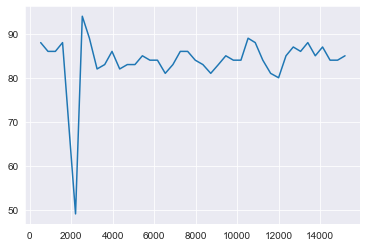

In [101]:
ecg.query('`Heart Rate`.notnull()')['Heart Rate'].plot()

<AxesSubplot:>

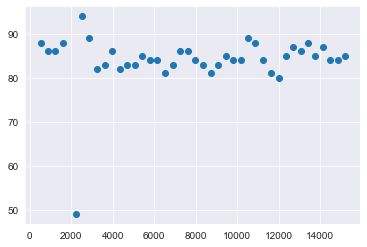

In [103]:
ecg['Heart Rate'].plot(marker='o')

# Extraction rythme cardiaque du fichier export.xml

In [38]:
os.chdir("..")
print(os.getcwd())

/Users/Patrice/DataspellProjects/Physio/Data/La_planete_au_tresor/ecg


In [61]:
rythme = pd.read_xml("export.xml", xpath=".//Record[@type='HKQuantityTypeIdentifierHeartRate']")

In [62]:
rythme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66868 entries, 0 to 66867
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           66868 non-null  object 
 1   sourceName     66868 non-null  object 
 2   sourceVersion  66868 non-null  object 
 3   device         66868 non-null  object 
 4   unit           66868 non-null  object 
 5   creationDate   66868 non-null  object 
 6   startDate      66868 non-null  object 
 7   endDate        66868 non-null  object 
 8   value          66868 non-null  float64
 9   MetadataEntry  0 non-null      float64
dtypes: float64(2), object(8)
memory usage: 5.1+ MB


In [63]:
rythme.head(10)

,type,sourceName,sourceVersion,device,unit,creationDate,startDate,endDate,value,MetadataEntry
0,HKQuantityTypeIdentifierHeartRate,Apple Watch,6.1.3,"<<HKDevice: 0x281669ae0>, name:Apple Watch, ma...",count/min,2020-03-17 09:29:35 +0100,2020-03-17 09:24:38 +0100,2020-03-17 09:24:38 +0100,92.0,NaN
1,HKQuantityTypeIdentifierHeartRate,Apple Watch,6.1.3,"<<HKDevice: 0x28166bac0>, name:Apple Watch, ma...",count/min,2020-03-17 11:41:52 +0100,2020-03-17 09:27:54 +0100,2020-03-17 09:27:54 +0100,93.0,NaN
2,HKQuantityTypeIdentifierHeartRate,Apple Watch,6.1.3,"<<HKDevice: 0x2816680a0>, name:Apple Watch, ma...",count/min,2020-03-18 11:06:59 +0100,2020-03-18 11:06:58 +0100,2020-03-18 11:06:58 +0100,82.0,NaN
3,HKQuantityTypeIdentifierHeartRate,Apple Watch,6.1.3,"<<HKDevice: 0x28166bc00>, name:Apple Watch, ma...",count/min,2020-03-18 11:07:04 +0100,2020-03-18 11:07:00 +0100,2020-03-18 11:07:00 +0100,82.0,NaN
4,HKQuantityTypeIdentifierHeartRate,Apple Watch,6.1.3,"<<HKDevice: 0x28166bb60>, name:Apple Watch, ma...",count/min,2020-03-18 11:07:13 +0100,2020-03-18 11:07:12 +0100,2020-03-18 11:07:12 +0100,91.0,NaN
5,HKQuantityTypeIdentifierHeartRate,Apple Watch,6.1.3,"<<HKDevice: 0x281669b30>, name:Apple Watch, ma...",count/min,2020-03-18 11:07:13 +0100,2020-03-18 11:07:13 +0100,2020-03-18 11:07:13 +0100,89.0,NaN
6,HKQuantityTypeIdentifierHeartRate,Apple Watch,6.1.3,"<<HKDevice: 0x281668b40>, name:Apple Watch, ma...",count/min,2020-03-18 11:07:15 +0100,2020-03-18 11:07:14 +0100,2020-03-18 11:07:14 +0100,89.0,NaN
7,HKQuantityTypeIdentifierHeartRate,Apple Watch,6.1.3,"<<HKDevice: 0x28166aa80>, name:Apple Watch, ma...",count/min,2020-03-18 11:07:16 +0100,2020-03-18 11:07:15 +0100,2020-03-18 11:07:15 +0100,88.0,NaN
8,HKQuantityTypeIdentifierHeartRate,Apple Watch,6.1.3,"<<HKDevice: 0x28166a7b0>, name:Apple Watch, ma...",count/min,2020-03-18 11:07:16 +0100,2020-03-18 11:07:16 +0100,2020-03-18 11:07:16 +0100,84.0,NaN
9,HKQuantityTypeIdentifierHeartRate,Apple Watch,6.1.3,"<<HKDevice: 0x28166a0d0>, name:Apple Watch, ma...",count/min,2020-03-18 11:07:18 +0100,2020-03-18 11:07:17 +0100,2020-03-18 11:07:17 +0100,90.0,NaN


In [64]:
rythme = rythme[['creationDate','startDate','value']]

<AxesSubplot:>

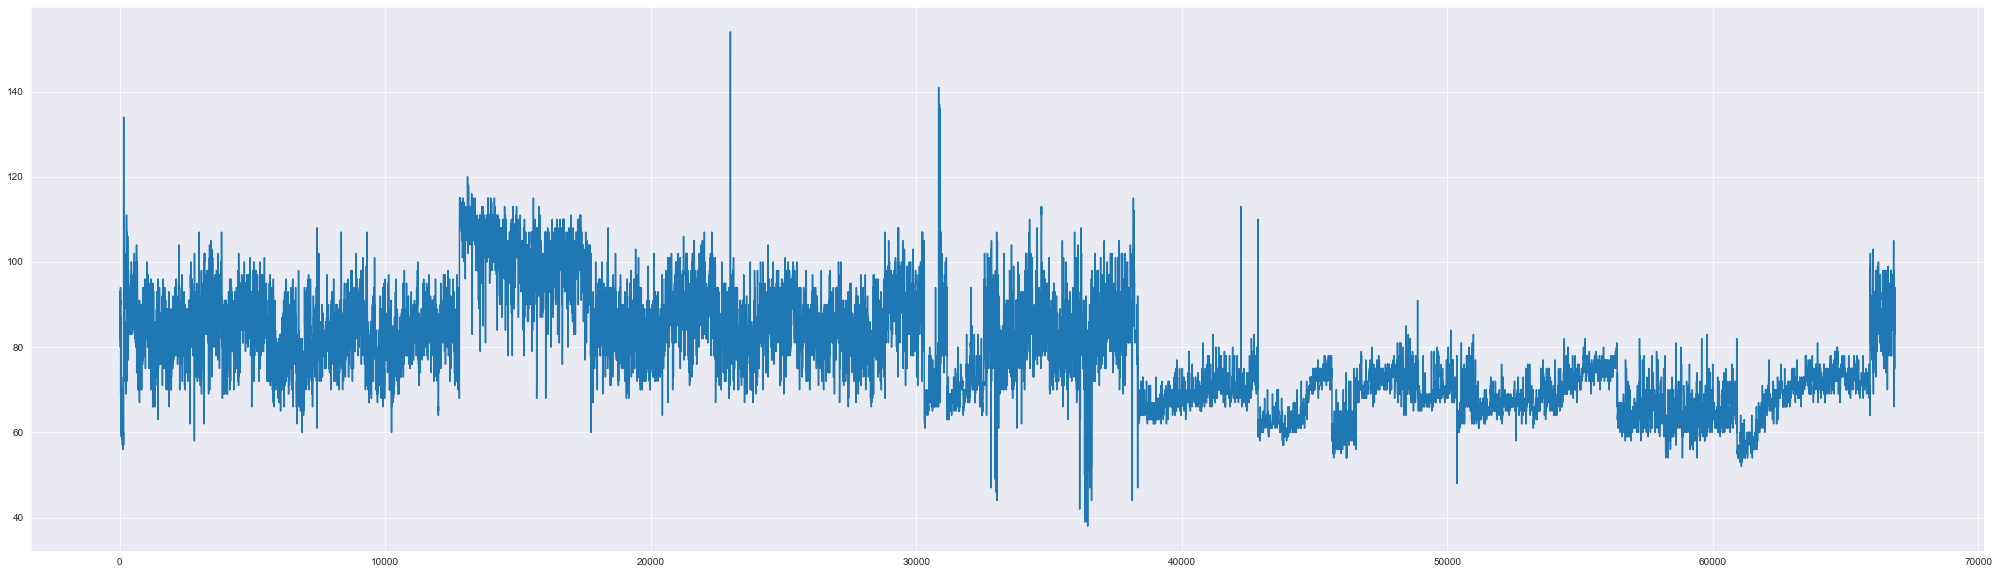

In [71]:
rythme['value'].astype(float).plot(figsize=(35,10))

In [66]:
rythme['creationDate'] = pd.to_datetime(rythme['creationDate'])
rythme['startDate'] = pd.to_datetime(rythme['startDate'])
rythme['value'] = rythme['value'].astype(int)

In [67]:
rythme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66868 entries, 0 to 66867
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype                               
---  ------        --------------  -----                               
 0   creationDate  66868 non-null  datetime64[ns, pytz.FixedOffset(60)]
 1   startDate     66868 non-null  datetime64[ns, pytz.FixedOffset(60)]
 2   value         66868 non-null  int64                               
dtypes: datetime64[ns, pytz.FixedOffset(60)](2), int64(1)
memory usage: 1.5 MB


In [68]:
rythme.describe()

,value
count,66868.000000
mean,78.717443
std,12.040502
min,38.000000
25%,69.000000
50%,77.000000
75%,87.000000
max,154.000000


In [180]:
rythme.tail()

,creationDate,value
startDate,,
2022-02-27 16:11:34+01:00,2022-02-27 16:11:35+01:00,86
2022-02-27 16:11:35+01:00,2022-02-27 16:11:36+01:00,85
2022-02-27 16:11:36+01:00,2022-02-27 16:11:36+01:00,85
2022-02-27 16:11:37+01:00,2022-02-27 16:11:38+01:00,85
2022-02-27 16:11:38+01:00,2022-02-27 16:11:39+01:00,85


In [183]:
rythme.loc[rythme.index==pd.Timestamp("2022-02-27 16:11:38+01:00")]

,creationDate,value
startDate,,
2022-02-27 16:11:38+01:00,2022-02-27 16:11:39+01:00,85


In [402]:
rythme.loc[(rythme.index.day==pd.Timestamp("2022-02-27 15:52:28+01:00").day) & (rythme.index.year==pd.Timestamp("2022-02-27 15:52:28+01:00").year) & (rythme.index.month==pd.Timestamp("2022-02-27 15:52:28+01:00").month)]

,creationDate,value
startDate,,
2022-02-27 15:52:31+01:00,2022-02-27 15:52:32+01:00,91
2022-02-27 15:52:32+01:00,2022-02-27 15:52:32+01:00,90
2022-02-27 15:52:33+01:00,2022-02-27 15:52:34+01:00,88
2022-02-27 15:52:34+01:00,2022-02-27 15:52:34+01:00,88
2022-02-27 15:52:35+01:00,2022-02-27 15:52:36+01:00,85
...,...,...
2022-02-27 16:11:34+01:00,2022-02-27 16:11:35+01:00,86
2022-02-27 16:11:35+01:00,2022-02-27 16:11:36+01:00,85
2022-02-27 16:11:36+01:00,2022-02-27 16:11:36+01:00,85


In [192]:
rythme.loc[(rythme.index.day==pd.Timestamp("2022-02-27 16:11:38+01:00").day) & (rythme.index.year==pd.Timestamp("2022-02-27 16:11:38+01:00").year) & (rythme.index.month==pd.Timestamp("2022-02-27 16:11:38+01:00").month)]['value']

91

In [204]:
(rythme.index[1] - pd.Timestamp("2022-02-27 16:11:38+01:00")).total_seconds()

-61541024.0

In [217]:
rythme.loc[(rythme.index - pd.Timestamp("2022-02-27 16:04:16+01:00")).total_seconds() == -4]

,creationDate,value
startDate,,
2022-02-27 16:04:12+01:00,2022-02-27 16:04:13+01:00,87


In [234]:
rythme.loc[(rythme.index - pd.Timestamp("2022-02-27 15:52:28+01:00")).total_seconds() == -4]

,creationDate,value
startDate,,


In [298]:
indices = rythme.loc[(rythme.index - pd.Timestamp("2022-02-27 16:04:16+01:00")).total_seconds() == -4]
print(indices)
numLigne = rythme.index.get_loc(indices.index[0])
print(numLigne)

                                       creationDate  value
startDate                                                 
2022-02-27 16:04:12+01:00 2022-02-27 16:04:13+01:00     87
66509


In [301]:
rythme.iloc[numLigne]['value']

87

In [162]:
rythme.loc["2022-02-27 16:08:19+01:00"].value

KeyError: '2022-02-27 16:08:19+01:00'

# ==============================================================================
# Lecture de tous les fichiers ECG
## synchronisation rythme cardiaque et ECG, estimation du rythme d'après l'ECG et affichage des courbes

In [105]:
rootDir = "/Users/Patrice/DataspellProjects/Physio/Data/La_planete_au_tresor/ecg/"
ecgDir = "electrocardiograms"
files = sorted(os.listdir(rootDir+ecgDir))
csvFiles = [f for f in files if f.endswith('.csv')]

In [106]:
print(csvFiles)

['ecg_2022-02-27_00.csv', 'ecg_2022-02-27_01.csv', 'ecg_2022-02-27_02.csv', 'ecg_2022-02-27_03.csv', 'ecg_2022-02-27_04.csv', 'ecg_2022-02-27_05.csv', 'ecg_2022-02-27_06.csv', 'ecg_2022-02-27_07.csv', 'ecg_2022-02-27_08.csv', 'ecg_2022-02-27_09.csv', 'ecg_2022-02-27_10.csv', 'ecg_2022-02-27_11.csv', 'ecg_2022-02-27_12.csv', 'ecg_2022-02-27_13.csv', 'ecg_2022-02-27_14.csv', 'ecg_2022-02-27_15.csv', 'ecg_2022-02-27_16.csv', 'ecg_2022-02-27_17.csv', 'ecg_2022-02-27_18.csv', 'ecg_2022-02-27_19.csv', 'ecg_2022-02-27_20.csv', 'ecg_2022-02-27_21.csv', 'ecg_2022-02-27_22.csv', 'ecg_2022-02-27_23.csv', 'ecg_2022-02-27_24.csv', 'ecg_2022-02-27_25.csv', 'ecg_2022-02-27_26.csv', 'ecg_2022-02-27_27.csv', 'ecg_2022-02-27_28.csv', 'ecg_2022-02-27_29.csv', 'ecg_2022-02-27_30.csv', 'ecg_2022-02-27_31.csv', 'ecg_2022-02-27_32.csv']


In [107]:
def lookForDate(f):
    date = pd.read_csv(f,skiprows=2,header=None,names=["name","date"], nrows=1, parse_dates=['date'])
    date = date['date']
    #print(date[0])
    return date

In [133]:
# lecture du fichier export.xml --> dataframe rythme
rythme = pd.read_xml(rootDir+"export.xml", xpath=".//Record[@type='HKQuantityTypeIdentifierHeartRate']")
rythme = rythme[['creationDate','startDate','value']]
rythme['creationDate'] = pd.to_datetime(rythme['creationDate'])
rythme['startDate'] = pd.to_datetime(rythme['startDate'])
rythme.set_index(pd.DatetimeIndex(rythme['startDate']), inplace=True)
rythme.drop('startDate', inplace=True, axis=1)
rythme['value'] = rythme['value'].astype(int)

In [109]:
rythme.head()

,creationDate,value
startDate,,
2020-03-17 09:24:38+01:00,2020-03-17 09:29:35+01:00,92
2020-03-17 09:27:54+01:00,2020-03-17 11:41:52+01:00,93
2020-03-18 11:06:58+01:00,2020-03-18 11:06:59+01:00,82
2020-03-18 11:07:00+01:00,2020-03-18 11:07:04+01:00,82
2020-03-18 11:07:12+01:00,2020-03-18 11:07:13+01:00,91


In [127]:
def afficheEcg(ecg, titre, axe=None):
    #ax = ecg.iloc[0:5000]['derivation'].plot(figsize=(15,10))
    #ecg.iloc[0:25000]['Heart Rate'].plot(ax=ax)
    #ax = ecg['derivation'].plot(figsize=(25,20))
    ecg['derivation'].plot(ax=axe, legend=True)
    ax2 = axe.twinx()
    ax2.set_ylim([60,120])
    ecg['Heart Rate'].plot(ax=ax2, color='red', title=titre, legend = True)
    ecg.query('`Heart Rate ECG`.notnull()')['Heart Rate ECG'].plot(ax=ax2, color='yellow', grid=True, legend=True)
    #plt.show()

(5, 2)
[<AxesSubplot:> <AxesSubplot:>]
Traitement de ecg_2022-02-27_00.csv enregistré à 2022-02-27 15:52:28+01:00
90  ------------------------ à  2022-02-27 15:52:28+01:00     ligne  65959
164 763.0 
284 478.0 rythme = 255 pour une différence de 120
518 891.0 rythme = 131 pour une différence de 234
1178 957.0 rythme = 46 pour une différence de 660
1290 432.0 rythme = 273 pour une différence de 112
1531 459.0 rythme = 127 pour une différence de 241
1895 746.0 rythme = 84 pour une différence de 364
2255 717.0 rythme = 85 pour une différence de 360
2604 636.0 rythme = 87 pour une différence de 349
2966 745.0 rythme = 84 pour une différence de 362
3327 638.0 rythme = 84 pour une différence de 361
3686 579.0 rythme = 85 pour une différence de 359
4040 580.0 rythme = 86 pour une différence de 354
4392 730.0 rythme = 87 pour une différence de 352
4904 422.0 rythme = 59 pour une différence de 512
5116 926.0 rythme = 144 pour une différence de 212
5171 413.0 rythme = 557 pour une différence de 

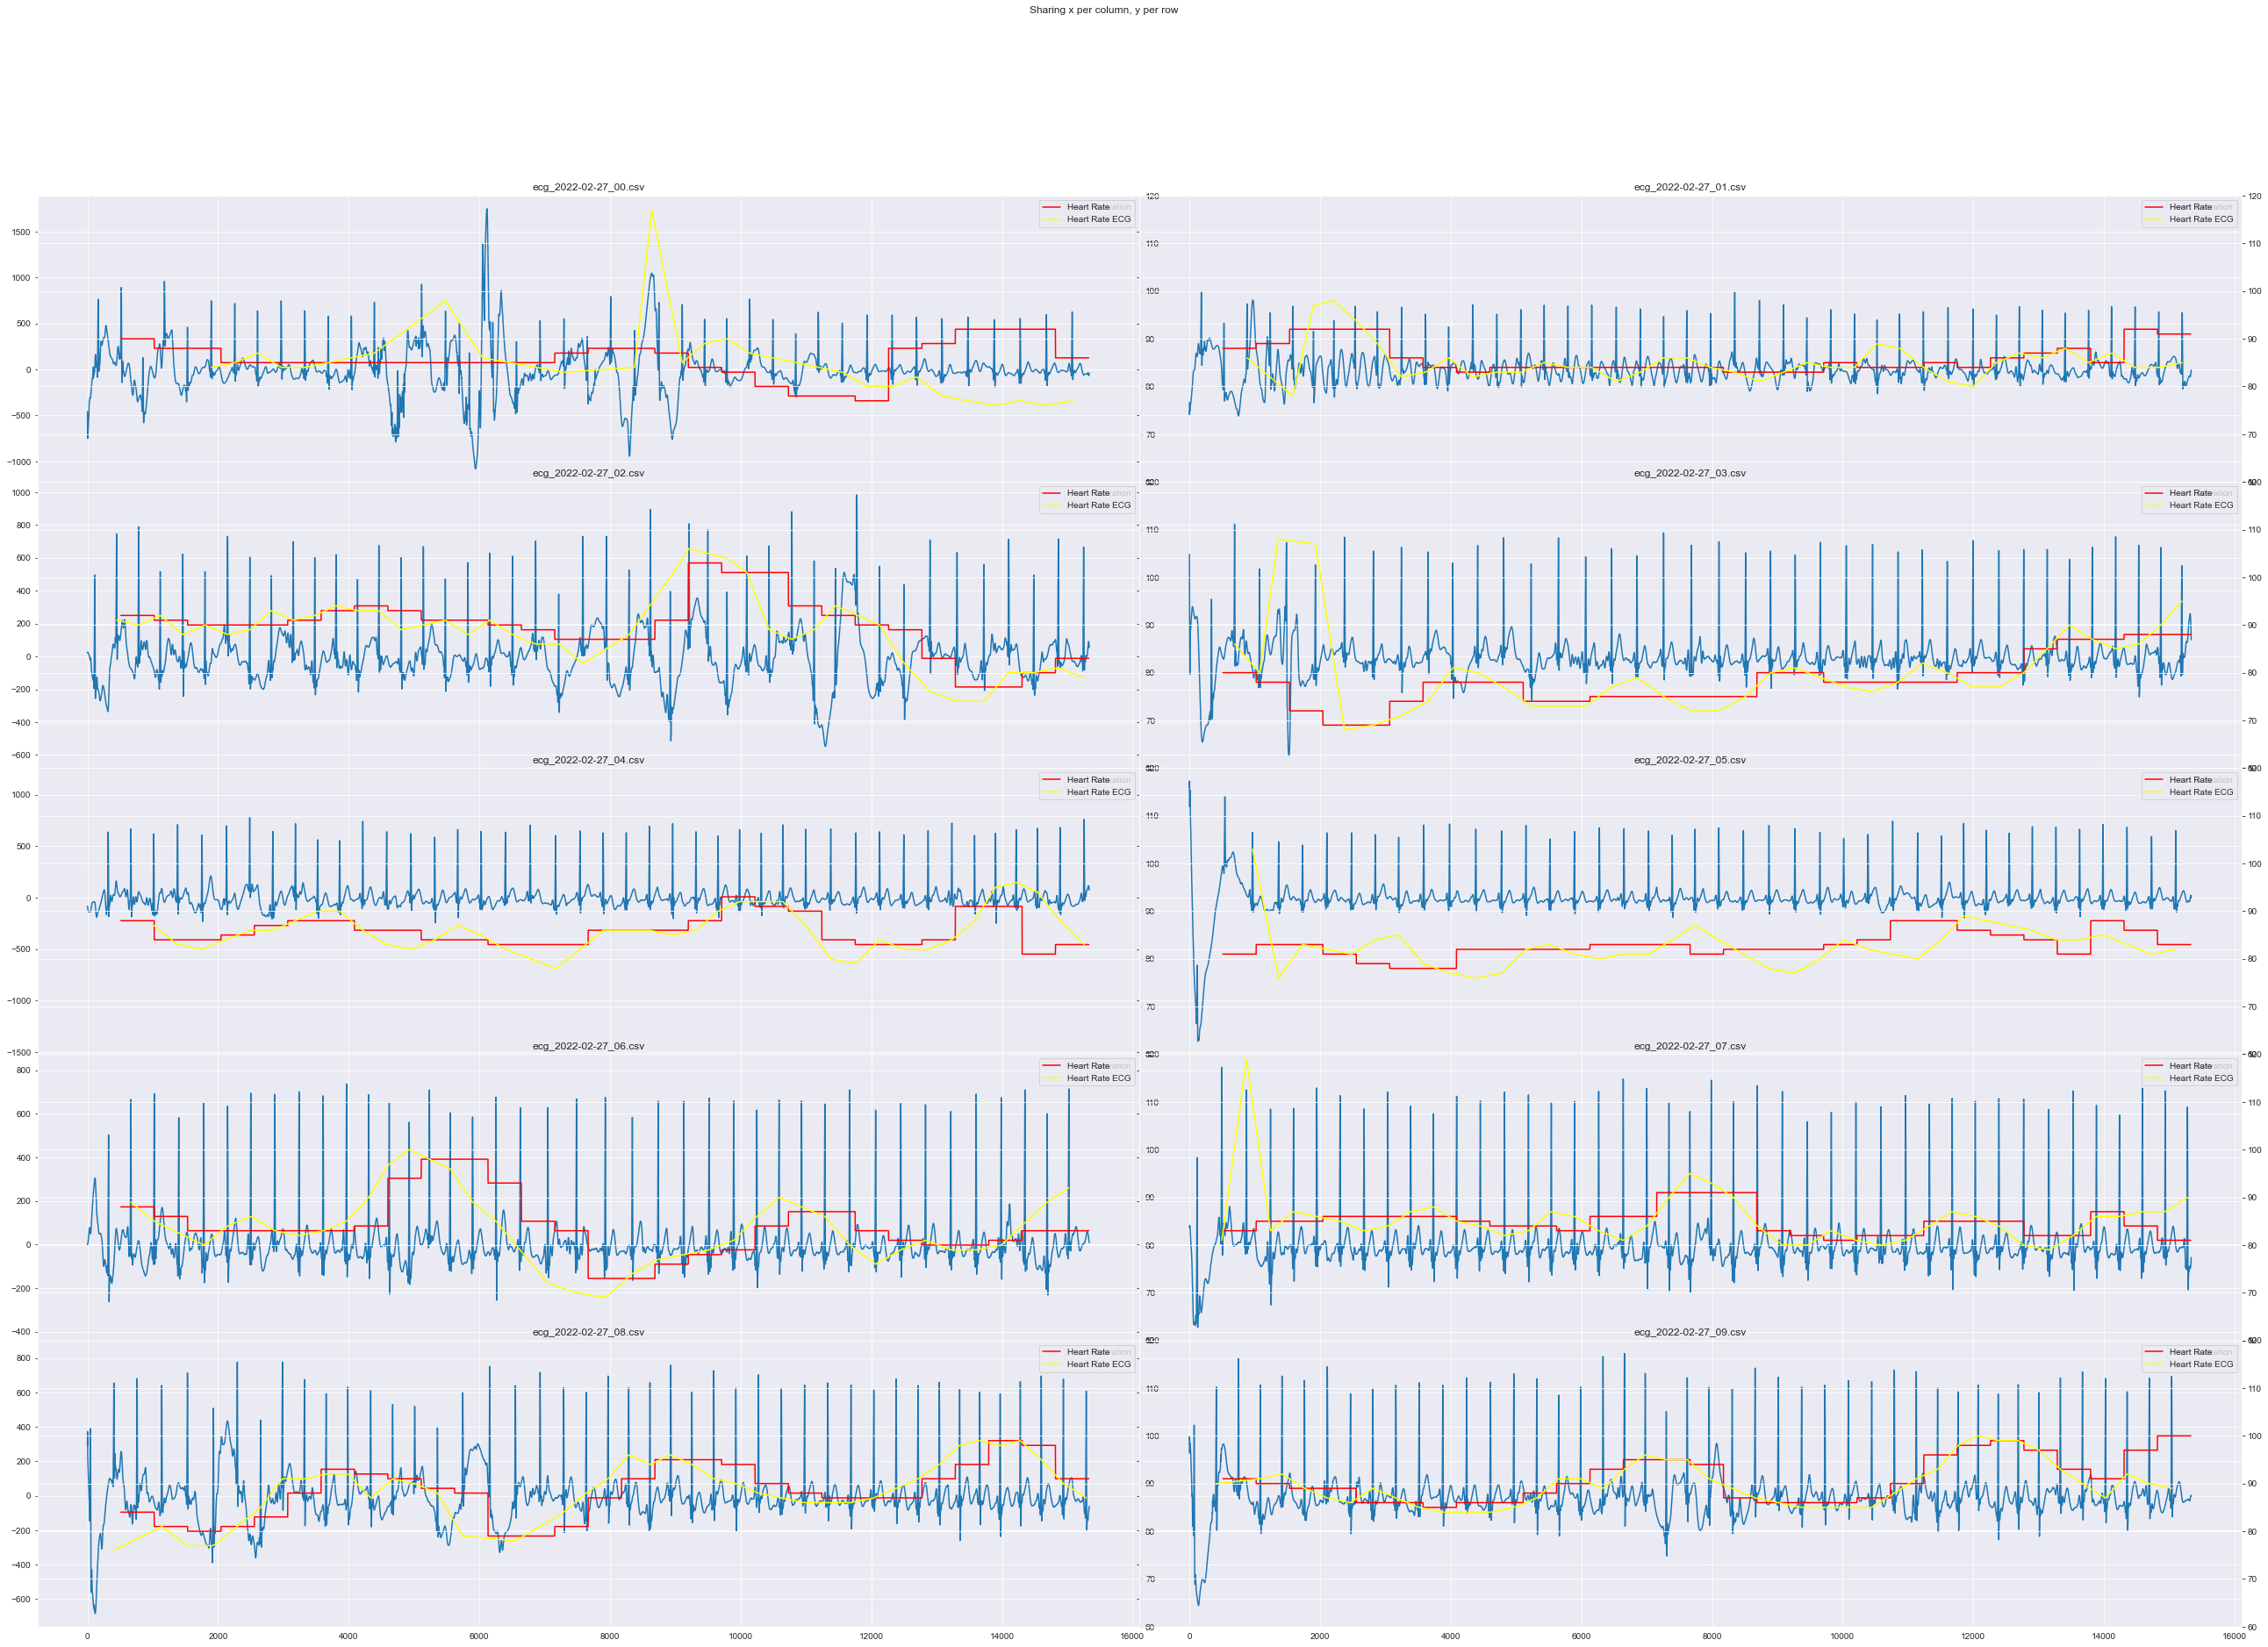

In [135]:
nbFichiers = 0
fig = plt.figure(figsize=(45,30))
gs = fig.add_gridspec(5, 2, hspace=0, wspace=0) #nombre de lignes et colonnes pour l'affichage des figures
#(ax1, ax2), (ax3, ax4) , (ax5, ax6) \
axes = gs.subplots(sharex='col', sharey='row')
print(axes.shape)
print(axes[0])
fig.suptitle('Sharing x per column, y per row')
for f in csvFiles:
    date = lookForDate(f)
    print("Traitement de "+f+" enregistré à "+str(date[0]))
    ecg = pd.read_csv(f,skiprows=13,header=None,names=["derivation","derivationDI"])
    ecg['Heart Rate'] = [np.nan for i in range(len(ecg))] # d'après le fichier export.xml
    ecg['Heart Rate ECG'] = [np.nan for i in range(len(ecg))] # calculé à partir des pics de l'ECG

    #Alignement de Heart Rate depuis export.xml
    indiceRate = rythme.loc[((rythme.index - date[0]).total_seconds() >= 4) & ((rythme.index - date[0]).total_seconds() <= 10)]
    rate = indiceRate['value']
    indice = rythme.index.get_loc(indiceRate.index[0]) #num ligne de export.xml (rythme cardiaque) correspondant au timestamp de début fichier ecg
    if len(rate)>0:
        print (rate[0]," ------------------------ à ",date[0],"    ligne ",indice)
        offset = 1 #décalage entre ECG et Heart Rate en seconde
        for i in range(offset,30):
            for j in range(511): #meme rythme pendant 1 seconde
                num = (i*511)+j
                if i == offset:
                    ecg.iloc[num,2] = rate[0]
                else:
                    ecg.iloc[num,2] = rate
            indice += 1 # passe à la seconde suivante dans le fichier rythme
            rate = rythme.iloc[indice]["value"]
            #print(" ",rate)
    else:
        print(" !!!!!! NON TROUVE : "+ str(date[0]))

    #Calcul Heart Rate à partir des pics de l'ECG
    limite = 1.5*ecg.derivation.std() # un pic se trouve dans des zones de valeurs > 1,5 x std
    n = 0
    n_prec = 0
    periode = 1/511.244
    while n < len(ecg):
        max = ecg.iloc[n].derivation
        if  (max > limite):
            while True:
                if (n+1 < len(ecg) and ecg.iloc[n+1].derivation >= max):
                    max = ecg.iloc[n+1].derivation
                    n +=1
                else:
                    break
            print (n, max, end=' ')
            if n_prec > 0:
                rate = int(60/((n-n_prec)*periode))
                print (f"rythme = {rate} pour une différence de {n-n_prec}")
                if (rate < 120 and rate > 60):
                    ecg.iloc[n,3] = rate
            else:
                print ('')
            n_prec = n
            n +=50
        else:
            n +=1

    afficheEcg(ecg,titre=f, axe=axes[nbFichiers//2,nbFichiers%2])
    #display(ecg)
    #ecg.info()
    nbFichiers +=1
    if nbFichiers == 10: # nombre de séquences à traiter !!!! pour que les graphiques s'affichent, changer aussi le nombre de figures lignes/colonnes (ligne 3 de cette cellule)
        break


In [403]:
ecg.info(

)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15337 entries, 0 to 15336
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   derivation    15337 non-null  int64  
 1   derivationDI  15328 non-null  float64
 2   Heart Rate    13286 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 359.6 KB


In [404]:
ecg.describe()

,derivation,derivationDI,Heart Rate
count,15337.000000,15328.000000,13286.000000
mean,-9.761557,451.885765,82.538462
std,172.441525,304.720797,2.389663
min,-1395.000000,1.000000,78.000000
25%,-42.000000,166.000000,81.000000
50%,-22.000000,439.000000,82.000000
75%,19.000000,721.000000,83.000000
max,1132.000000,999.000000,88.000000
